In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /Users/william/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/william/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/william/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import pandas as pd

# Load the dataset
file_path = '/Users/william/Desktop/wiki_movie_plots_processed 2.xlsx'
movie_data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
movie_data.head()


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Processed_Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",bartender working saloon serving drink custome...
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",moon painted smiling face hang park night youn...
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",film minute long composed two shot first girl ...
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,lasting second consisting two shot first shot ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,earliest known adaptation classic fairytale fi...


In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Load stopwords
stop_words = set(stopwords.words('english'))

def preprocess_plot(plot):
    if isinstance(plot, float):
        # Handle NaN or non-string plot descriptions
        return ""
    
    # Tokenize the plot
    tokens = word_tokenize(plot)
    
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a single string
    processed_plot = ' '.join(tokens)
    
    return processed_plot

# Load the dataset
file_path = 'wiki_movie_plots_processed 2.xlsx'  # Update the path as necessary
movie_data = pd.read_excel(file_path)

# Apply preprocessing to the 'Plot' column
movie_data['Processed_Plot'] = movie_data['Plot'].apply(preprocess_plot)

# Display the first few rows of the dataset to confirm preprocessing
print(movie_data[['Plot', 'Processed_Plot']].head())

# Save the preprocessed data to a new file
output_file_path = 'preprocessed_movie_plots.xlsx'
movie_data.to_excel(output_file_path, index=False)
print(f"Preprocessed data saved to {output_file_path}")



                                                Plot  \
0  A bartender is working at a saloon, serving dr...   
1  The moon, painted with a smiling face hangs ov...   
2  The film, just over a minute long, is composed...   
3  Lasting just 61 seconds and consisting of two ...   
4  The earliest known adaptation of the classic f...   

                                      Processed_Plot  
0  bartender working saloon serving drink custome...  
1  moon painted smiling face hang park night youn...  
2  film minute long composed two shot first girl ...  
3  lasting 61 second consisting two shot first sh...  
4  earliest known adaptation classic fairytale fi...  
Preprocessed data saved to preprocessed_movie_plots.xlsx


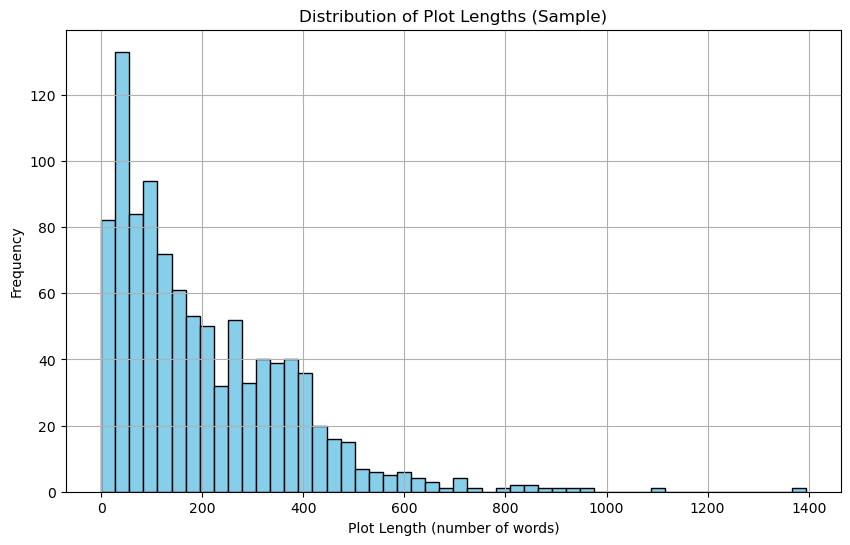

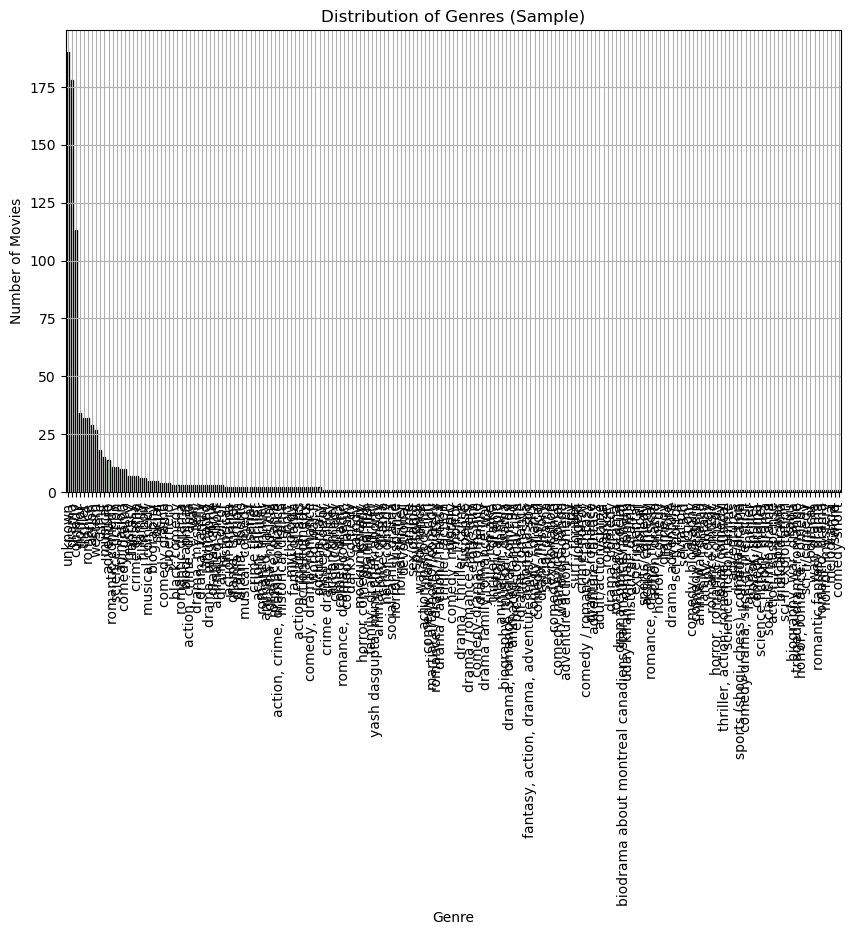

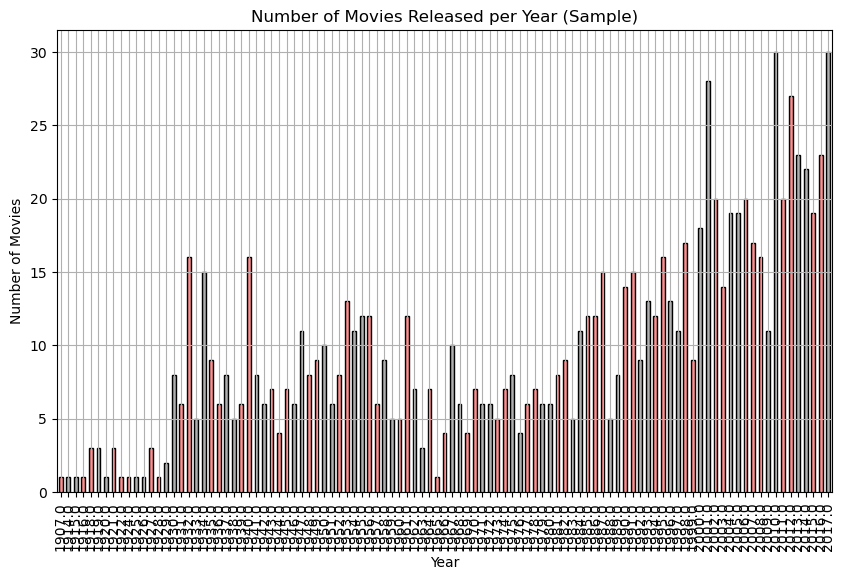

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed movie plots Excel file
file_path = '/Users/william/Desktop/preprocessed_movie_plots.xlsx'
preprocessed_data = pd.read_excel(file_path)

# Fill missing values in the 'Processed_Plot' column with an empty string
preprocessed_data['Processed_Plot'] = preprocessed_data['Processed_Plot'].fillna('').astype(str)

# Convert the 'Release Year' column to numeric, coercing errors to handle non-numeric values
preprocessed_data['Release Year'] = pd.to_numeric(preprocessed_data['Release Year'], errors='coerce')

# Sample a subset of the data
sample_data = preprocessed_data.sample(n=1000, random_state=42)

# 1. Plot Length Analysis on the sample
sample_data['Plot_Length'] = sample_data['Processed_Plot'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
plt.hist(sample_data['Plot_Length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Plot Lengths (Sample)')
plt.xlabel('Plot Length (number of words)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Genre Distribution on the sample
plt.figure(figsize=(10, 6))
sample_data['Genre'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Genres (Sample)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# 3. Year-wise Analysis on the sample
plt.figure(figsize=(10, 6))
sample_data['Release Year'].value_counts().sort_index().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Number of Movies Released per Year (Sample)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()
